# **ĐỒ ÁN CUỐI KÌ: KHOA HỌC DỮ LIỆU ỨNG DỤNG**

## **Thực hiện:**
|<font size=4> Tên </font>|<font size=4> MSSV </font>|
|-------------------------|----------------------------------|
|<font size=4> Nguyễn Đình Hoàng Nguyên </font>|<font size=4> 19120606 </font>|

# **Giai đoạn 3:**

# **3.0. Dowload dữ liệu**

In [1]:
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/train.csv
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/test.csv
!wget https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/sample_submission.csv

--2024-02-28 09:42:05--  https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28308747 (27M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  27.00M  --.-KB/s    in 0.1s    

2024-02-28 09:42:06 (229 MB/s) - ‘train.csv’ saved [28308747/28308747]

--2024-02-28 09:42:06--  https://raw.githubusercontent.com/HoangNguyen31/Final-Project-Applied-Data-Science/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

# **3.1. Import thư viện**

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.5 MB/s eta 0:00:00


In [3]:
# Thư viện xử lý dữ liệu
import numpy as np
import pandas as pd

import ast
from collections import Counter
from wordcloud import WordCloud

import time
from datetime import datetime

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện dùng để thực hiện mô hình học máy
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Bỏ qua các warnings
import warnings
warnings.filterwarnings("ignore")

# **3.2. Đọc dữ liệu**

In [4]:
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")

# **3.3. Sửa một số dữ liệu theo yêu cầu cuộc thi**

In [5]:
train.loc[train["id"] == 16,"revenue"] = 192864
train.loc[train["id"] == 90,"budget"] = 30000000
train.loc[train["id"] == 118,"budget"] = 60000000
train.loc[train["id"] == 149,"budget"] = 18000000
train.loc[train["id"] == 313,"revenue"] = 12000000
train.loc[train["id"] == 451,"revenue"] = 12000000
train.loc[train["id"] == 464,"budget"] = 20000000
train.loc[train["id"] == 470,"budget"] = 13000000
train.loc[train["id"] == 513,"budget"] = 930000
train.loc[train["id"] == 797,"budget"] = 8000000
train.loc[train["id"] == 819,"budget"] = 90000000
train.loc[train["id"] == 850,"budget"] = 90000000
train.loc[train["id"] == 1007,"budget"] = 2
train.loc[train["id"] == 1112,"budget"] = 7500000
train.loc[train["id"] == 1131,"budget"] = 4300000
train.loc[train["id"] == 1359,"budget"] = 10000000
train.loc[train["id"] == 1542,"budget"] = 1
train.loc[train["id"] == 1570,"budget"] = 15800000
train.loc[train["id"] == 1571,"budget"] = 4000000
train.loc[train["id"] == 1714,"budget"] = 46000000
train.loc[train["id"] == 1721,"budget"] = 17500000
train.loc[train["id"] == 1865,"revenue"] = 25000000
train.loc[train["id"] == 1885,"budget"] = 12
train.loc[train["id"] == 2091,"budget"] = 10
train.loc[train["id"] == 2268,"budget"] = 17500000
train.loc[train["id"] == 2491,"budget"] = 6
train.loc[train["id"] == 2602,"budget"] = 31000000
train.loc[train["id"] == 2612,"budget"] = 15000000
train.loc[train["id"] == 2696,"budget"] = 10000000
train.loc[train["id"] == 2801,"budget"] = 10000000
train.loc[train["id"] == 335,"budget"] = 2
train.loc[train["id"] == 348,"budget"] = 12
train.loc[train["id"] == 470,"budget"] = 13000000
train.loc[train["id"] == 513,"budget"] = 1100000
train.loc[train["id"] == 640,"budget"] = 6
train.loc[train["id"] == 696,"budget"] = 1
train.loc[train["id"] == 797,"budget"] = 8000000
train.loc[train["id"] == 850,"budget"] = 1500000
train.loc[train["id"] == 1199,"budget"] = 5
train.loc[train["id"] == 1282,"budget"] = 9
train.loc[train["id"] == 1347,"budget"] = 1
train.loc[train["id"] == 1755,"budget"] = 2
train.loc[train["id"] == 1801,"budget"] = 5
train.loc[train["id"] == 1918,"budget"] = 592
train.loc[train["id"] == 2033,"budget"] = 4
train.loc[train["id"] == 2118,"budget"] = 344
train.loc[train["id"] == 2252,"budget"] = 130
train.loc[train["id"] == 2256,"budget"] = 1
train.loc[train["id"] == 2696,"budget"] = 10000000

test.loc[test["id"] == 6733,"budget"] = 5000000
test.loc[test["id"] == 3889,"budget"] = 15000000
test.loc[test["id"] == 6683,"budget"] = 50000000
test.loc[test["id"] == 5704,"budget"] = 4300000
test.loc[test["id"] == 6109,"budget"] = 281756
test.loc[test["id"] == 7242,"budget"] = 10000000
test.loc[test["id"] == 7021,"budget"] = 17540562
test.loc[test["id"] == 5591,"budget"] = 4000000
test.loc[test["id"] == 4282,"budget"] = 20000000
test.loc[test["id"] == 3033,"budget"] = 250
test.loc[test["id"] == 3051,"budget"] = 50
test.loc[test["id"] == 3084,"budget"] = 337
test.loc[test["id"] == 3224,"budget"] = 4
test.loc[test["id"] == 3594,"budget"] = 25
test.loc[test["id"] == 3619,"budget"] = 500
test.loc[test["id"] == 3831,"budget"] = 3
test.loc[test["id"] == 3935,"budget"] = 500
test.loc[test["id"] == 4049,"budget"] = 995946
test.loc[test["id"] == 4424,"budget"] = 3
test.loc[test["id"] == 4460,"budget"] = 8
test.loc[test["id"] == 4555,"budget"] = 1200000
test.loc[test["id"] == 4624,"budget"] = 30
test.loc[test["id"] == 4645,"budget"] = 500
test.loc[test["id"] == 4709,"budget"] = 450
test.loc[test["id"] == 4839,"budget"] = 7
test.loc[test["id"] == 3125,"budget"] = 25
test.loc[test["id"] == 3142,"budget"] = 1
test.loc[test["id"] == 3201,"budget"] = 450
test.loc[test["id"] == 3222,"budget"] = 6
test.loc[test["id"] == 3545,"budget"] = 38
test.loc[test["id"] == 3670,"budget"] = 18
test.loc[test["id"] == 3792,"budget"] = 19
test.loc[test["id"] == 3881,"budget"] = 7
test.loc[test["id"] == 3969,"budget"] = 400
test.loc[test["id"] == 4196,"budget"] = 6
test.loc[test["id"] == 4221,"budget"] = 11
test.loc[test["id"] == 4222,"budget"] = 500
test.loc[test["id"] == 4285,"budget"] = 11
test.loc[test["id"] == 4319,"budget"] = 1
test.loc[test["id"] == 4639,"budget"] = 10
test.loc[test["id"] == 4719,"budget"] = 45
test.loc[test["id"] == 4822,"budget"] = 22
test.loc[test["id"] == 4829,"budget"] = 20
test.loc[test["id"] == 4969,"budget"] = 20
test.loc[test["id"] == 5021,"budget"] = 40
test.loc[test["id"] == 5035,"budget"] = 1
test.loc[test["id"] == 5063,"budget"] = 14
test.loc[test["id"] == 5119,"budget"] = 2
test.loc[test["id"] == 5214,"budget"] = 30
test.loc[test["id"] == 5221,"budget"] = 50
test.loc[test["id"] == 4903,"budget"] = 15
test.loc[test["id"] == 4983,"budget"] = 3
test.loc[test["id"] == 5102,"budget"] = 28
test.loc[test["id"] == 5217,"budget"] = 75
test.loc[test["id"] == 5224,"budget"] = 3
test.loc[test["id"] == 5469,"budget"] = 20
test.loc[test["id"] == 5840,"budget"] = 1
test.loc[test["id"] == 5960,"budget"] = 30
test.loc[test["id"] == 6506,"budget"] = 11
test.loc[test["id"] == 6553,"budget"] = 280
test.loc[test["id"] == 6561,"budget"] = 7
test.loc[test["id"] == 6582,"budget"] = 218
test.loc[test["id"] == 6638,"budget"] = 5
test.loc[test["id"] == 6749,"budget"] = 8
test.loc[test["id"] == 6759,"budget"] = 50
test.loc[test["id"] == 6856,"budget"] = 10
test.loc[test["id"] == 6858,"budget"] =  100
test.loc[test["id"] == 6876,"budget"] =  250
test.loc[test["id"] == 6972,"budget"] = 1
test.loc[test["id"] == 7079,"budget"] = 8000000
test.loc[test["id"] == 7150,"budget"] = 118
test.loc[test["id"] == 6506,"budget"] = 118
test.loc[test["id"] == 7225,"budget"] = 6
test.loc[test["id"] == 7231,"budget"] = 85
test.loc[test["id"] == 5222,"budget"] = 5
test.loc[test["id"] == 5322,"budget"] = 90
test.loc[test["id"] == 5350,"budget"] = 70
test.loc[test["id"] == 5378,"budget"] = 10
test.loc[test["id"] == 5545,"budget"] = 80
test.loc[test["id"] == 5810,"budget"] = 8
test.loc[test["id"] == 5926,"budget"] = 300
test.loc[test["id"] == 5927,"budget"] = 4
test.loc[test["id"] == 5986,"budget"] = 1
test.loc[test["id"] == 6053,"budget"] = 20
test.loc[test["id"] == 6104,"budget"] = 1
test.loc[test["id"] == 6130,"budget"] = 30
test.loc[test["id"] == 6301,"budget"] = 150
test.loc[test["id"] == 6276,"budget"] = 100
test.loc[test["id"] == 6473,"budget"] = 100
test.loc[test["id"] == 6842,"budget"] = 30

test.loc[test["release_date"].isnull() == True, "release_date"] = "01/01/98"

# **3.4. Rút trích đặc trưng**

## **3.4.1. Tình trạng khuyết dữ liệu (Missing data)**

In [6]:
null_df = pd.DataFrame(train.isnull().sum(), columns=["Số mẫu bị thiếu"])
null_df["Tỉ lệ bị thiếu"] = np.round(train.isnull().sum() / train.shape[0] * 100, 2)
null_df.index.name = "Thuộc tính"
null_df = null_df.sort_values(by="Tỉ lệ bị thiếu", ascending=False)
null_df.loc[null_df["Tỉ lệ bị thiếu"] > 0]

,Số mẫu bị thiếu,Tỉ lệ bị thiếu
Thuộc tính,,
belongs_to_collection,2396,79.87
homepage,2054,68.47
tagline,597,19.90
Keywords,276,9.20
production_companies,156,5.20
production_countries,55,1.83
spoken_languages,20,0.67
crew,16,0.53
cast,13,0.43


## **3.4.2. Số hóa giá trị thuộc tính và Xử lí tình trạng khuyết dữ liệu (Missing data)**
- Những thuộc tính ta chọn cho bộ dữ liệu:
  + Thuộc tính `belongs_to_collection` ta sẽ lấy có thuộc bộ sưu tập hay không (có nằm trong bộ sưu tập là 1 và không nằm trong bộ sưu tập là 0).
  + Thuộc tính `homepage`, `poster_path`, `status` cũng tương tự khi nếu có là 1 và không có là 0.
  + Thuộc tính `original_title`, `title`, `overview` ta sẽ lấy độ dài của câu đó và số lượng chữ cái trong câu đó.
  + Thuộc tính `tagline` ta sẽ lấy 3 đặc trưng: ta sẽ lấy độ dài của câu đó, số lượng chữ cái trong câu đó và có hay không khẩu hiệu của phim.
  + Thuộc tính `release_date` ta sẽ chia thành 5 thuộc tính con: ngày phát hành, tháng phát hành,  năm phát hành, ngày trong tuần phát hành, quý phát hành.
  + Các thuộc tính `genres`, `production_companies`, `production_countries`, `Keywords` ta sẽ lấy số lượng tên của các mẫu trong thuộc tính và những mẫu dữ liệu nào thuộc tính xuất hiện trên 10 lần thì ta sẽ lấy.
  + Thuộc tính `cast`, `crew` ta sẽ lấy tên của những mẫu dữ liệu nào thuộc tính xuất hiện trên 10 lần, giới tính và tổng số lượng thành viên.
  + Thuộc tính `spoken_languages` cũng tương tự nhưng ta sẽ lấy kí hiệu của mẫu dữ liệu nào thuộc tính xuất hiện trên 10 lần .
  + Thuộc tính `original_language` ta lấy tất cả mẫu dữ liệu xuất hiện.
  + Các thuộc tính `budget`, `popularity`, `revenue` ta sẽ chuyển sang log1p của chúng.
  + Thuộc tính `runtime` ta sẽ giữ nguyên.
  + Ta thêm một số thuộc tính như `budget/runtime`, `budget/popularity`, `budget/year`, `popularity/year`, `runtime/year`,... Những thuộc tính như thê này ta có thể thay đổi linh hoạt để tìm ra các giá trị giúp mô hình đạt kết quả tốt hơn.

In [7]:
def text_to_dict(df, dict_columns):
  for column in dict_columns:
    df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
  return df

In [8]:
def fix_date(x):
  year = x.split("/")[2]
  if int(year) <= 19:
    return x[:-2] + "20" + year
  else:
    return x[:-2] + "19" + year

In [9]:
def date_features(df):
  df["release_date"] = pd.to_datetime(df["release_date"])
  df["release_year"] = df["release_date"].dt.year
  df["release_month"] = df["release_date"].dt.month
  df["release_day"] = df["release_date"].dt.day
  df["release_quarter"] = df["release_date"].dt.quarter
  df["release_dayofweek"] = df["release_date"].dt.dayofweek
  return df

In [10]:
def prepare_data(df):
    df["has_collection"] = df["belongs_to_collection"].apply(lambda x: len(x) if x != {} else 0)
    df["has_homepage"] = 1 - df["homepage"].isna()
    df["has_poster_path"] = df["poster_path"].notnull().astype(int)
    df["is_released"] = (df["status"] == "Released") * 1
    df["original_title_letter_count"] = df["original_title"].str.len()
    df["original_title_word_count"] = df["original_title"].str.split().str.len()
    df["title_letter_count"] = df["title"].str.len()
    df["title_word_count"] = df["title"].str.split().str.len()
    df["overview_letter_count"] = df["overview"].str.len()
    df["overview_word_count"] = df["overview"].str.split().str.len()
    df["has_tagline"] = 1 - df["tagline"].isna()
    df["tagline_letter_count"] = df["tagline"].str.len()
    df["tagline_word_count"] = df["tagline"].str.split().str.len()

    df["release_date"] = df["release_date"].apply(lambda x: fix_date(x))
    df = date_features(df)

    df["cast_names"] = df["cast"].apply(lambda x: [names["name"] for names in x])
    df["cast_count"] = df["cast_names"].apply(lambda x : len(x))
    df["genders_0_cast"] = df["cast"].apply(lambda x: sum([1 for i in x if i["gender"] == 0]))
    df["genders_1_cast"] = df["cast"].apply(lambda x: sum([1 for i in x if i["gender"] == 1]))
    df["genders_2_cast"] = df["cast"].apply(lambda x: sum([1 for i in x if i["gender"] == 2]))

    df["crew_names"] = df["crew"].apply(lambda x: [names["name"] for names in x])
    df["crew_count"] = df["crew_names"].apply(lambda x : len(x))
    df["genders_0_crew"] = df["crew"].apply(lambda x: sum([1 for i in x if i["gender"] == 0]))
    df["genders_1_crew"] = df["crew"].apply(lambda x: sum([1 for i in x if i["gender"] == 1]))
    df["genders_2_crew"] = df["crew"].apply(lambda x: sum([1 for i in x if i["gender"] == 2]))

    df["log_budget"] = np.log1p(df["budget"])
    df["log_popularity"] = np.log1p(df["popularity"])
    df["ratio_budget_runtime"] = (df["log_budget"] / df["runtime"]).replace([np.inf,-np.inf,np.nan],0)
    df["ratio_budget_popularity"] = df["log_budget"] / df["log_popularity"]
    df["ratio_budget_year"] = df["log_budget"] / df["release_year"]
    df["budget_to_mean_year"] = df["log_budget"] / df.groupby("release_year")["log_budget"].transform("mean")
    df["ratio_popularity_year"] = df["log_popularity"] / df["release_year"]
    df["popularity_to_mean_year"] = df["log_popularity"] / df.groupby("release_year")["log_popularity"].transform("mean")
    df["ratio_runtime_year"] = df["runtime"] / df["release_year"]
    df["runtime_to_mean_year"] = df["runtime"] / df.groupby("release_year")["runtime"].transform("mean")
    df["ratio_budget_year2"] = df["log_budget"].fillna(0) / (df["release_year"] * df["release_year"])
    df["mean_budget_to_year"] = df["budget_to_mean_year"] / df["release_year"]
    df["budget_to_runtime_to_year"] = df["ratio_budget_runtime"] / df["release_year"]
    df["ratio_year_popularity"] = df["release_year"] / df["log_popularity"]

    df.fillna(value=0.0, inplace = True)
    return df

In [11]:
def dist_processing(train, test, col, key):
  value_list = train[col].apply(lambda x: [i[key] for i in x] if x != {} else [])
  value_count = Counter([i for j in value_list for i in j]).most_common()
  top_list = [m[0] for m in value_count if m[1] > 10]

  train["num_" + col] = train[col].apply(lambda x: len(x) if x != {} else 0)
  train["all_" + col] = train[col].apply(lambda x: " ".join(sorted([i[key] for i in x])) if x != {} else "")
  test["num_" + col] = test[col].apply(lambda x: len(x) if x != {} else 0)
  test["all_" + col] = test[col].apply(lambda x: " ".join(sorted([i[key] for i in x])) if x != {} else "")

  for p in top_list:
    train[col + "_" + p] = train["all_" + col].apply(lambda x: 1 if p in x else 0)
    test[col + "_" + p] = test["all_" + col].apply(lambda x: 1 if p in x else 0)

  return train, test

In [12]:
dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries",
                "spoken_languages", "Keywords", "cast", "crew"]
train = text_to_dict(train, dict_columns)
test = text_to_dict(test, dict_columns)

train = prepare_data(train)
test = prepare_data(test)

text_cols = ["genres", "production_companies", "production_countries", "Keywords", "cast", "crew"]
for col in text_cols:
    train, test = dist_processing(train, test, col, "name")

train, test = dist_processing(train, test, "spoken_languages", "iso_639_1")

value_count = Counter(train["original_language"]).most_common()
top_list = [m[0] for m in value_count if m[1] > 10]
for p in top_list:
  train["original_language_" + p] = train["original_language"].apply(lambda x: 1 if p in x else 0)
  test["original_language_" + p] = test["original_language"].apply(lambda x: 1 if p in x else 0)

train["log_revenue"] = np.log1p(train["revenue"])

In [13]:
print("Kích thước tập train sau khi xử lý: ", train.shape)
print("Kích thước tập test sau khi xử lý: ", test.shape)

Kích thước tập train sau khi xử lý:  (3000, 1211)
Kích thước tập test sau khi xử lý:  (4398, 1209)


## **3.4.3. Giảm chiều dữ liệu**

In [14]:
remove_columns = ["id", "belongs_to_collection", "homepage", "poster_path", "status", "title", "original_title",
                  "overview", "tagline", "release_date", "imdb_id", "genres", "all_genres", "production_companies",
                  "all_production_companies", "production_countries", "all_production_countries", "original_language",
                  "spoken_languages", "all_spoken_languages", "Keywords", "all_Keywords", "cast", "cast_names",
                  "all_cast", "crew", "crew_names", "all_crew", "budget", "popularity"]

train = train.drop(remove_columns, axis=1)
train = train.drop("revenue", axis=1)

test = test.drop(remove_columns, axis=1)

In [15]:
print("Kích thước tập train sau khi giảm chiều: ", train.shape)
print("Kích thước tập test sau khi giảm chiều: ", test.shape)

Kích thước tập train sau khi giảm chiều:  (3000, 1180)
Kích thước tập test sau khi giảm chiều:  (4398, 1179)


## **3.4.4. Chuẩn hóa dữ liệu**

In [16]:
newnames = []
for col in train.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
train.columns = newnames

newnames = []
for col in test.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
test.columns = newnames

# **3.5. Khai thác dữ liệu + Thực nghiệm + Đánh giá kết quả**

- Do dữ liệu không có  nhiều nên ta sẽ dùng phương pháp k-fold cross validation để tăng độ hiệu quả của mô hình.
- Những mô hình mà nhóm chọn từ những mô hình từ đơn giản đến phức tạp: **`Linear Regression`**, **`Random Forest`**, **`Xgboost`**, **`Lightgbm`**, **`CatBoost`** để giải quyết bài toán.
- Lý do lựa chọn các thuật toán trên:
  + Đây đều là những thuật toán đều có thể áp dụng cho bài toán dự đoán doanh thu phim.
  + Thời gian giải quyết bài toán nhanh.
  + Hiệu suất tốt và khả năng ứng dụng linh hoạt.
- Độ đo sử dụng để đánh giá kết quả khai thác: root mean square error.
- Lý do sử dụng độ đo **`RMSE`**:
  + **`RMSE`** thường được sử dụng trong các bài toán dự đoán số, và doanh thu phim có tính số học rõ ràng.
  + **`RMSE`** có cùng đơn vị với đại lượng đang được dự đoán. Điều này giúp việc đánh giá hiệu suất dễ dàng và có ý nghĩa thực tiễn, vì chúng ta có thể so sánh giá trị **`RMSE`** trực tiếp với đại lượng thực tế mà chúng ta quan tâm.
  + Trong bài toán dự đoán doanh thu phim, nếu có những điểm dữ liệu quan trọng mà mô hình không dự đoán chính xác, **`RMSE`** sẽ tăng đáng kể, và điều này cho phép chúng ta nhận ra sự nhạy cảm và cần thiết để cải thiện mô hình.

In [17]:
X = train.drop(["log_revenue"], axis=1)
y = train["log_revenue"]

X_col = list(X.columns)
test = test.loc[:, X_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=22)

In [18]:
n_fold = 10
folds = list(KFold(n_splits=n_fold, shuffle=True, random_state=22).split(X))

In [19]:
def models(X_train, X_valid, y_train, y_valid, test, model_type, params, plot_feature_importance=False):
  pred = np.zeros(test.shape[0])
  val_pred = np.zeros(X_valid.shape[0])
  scores = []
  feature_importance = pd.DataFrame()

  for fold_n, (train_index, valid_index) in enumerate(folds):
    print("Fold", fold_n + 1, "bắt đầu lúc", time.ctime())
    X_train = X.loc[train_index,:]
    y_train = y[train_index]
    X_valid = X.loc[valid_index,:]
    y_valid = y[valid_index]

    # Linear Regression
    if model_type == "lr":
      model = LinearRegression()
      model.fit(X_train, y_train)
      y_pred_valid = model.predict(X_valid)
      y_pred = model.predict(test)

    # Random Forest
    if model_type == "rf":
        model = RandomForestRegressor(**params)
        model.fit(X_train, y_train)
        y_pred_valid = model.predict(X_valid)
        y_pred = model.predict(test)

    # XGBoost model
    if model_type == "xgb":
      model = xgb.XGBRegressor(**params, n_estimators = 10000)
      model.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_valid, y_valid)],
                verbose=False,
                early_stopping_rounds=200)
      y_pred_valid = model.predict(X_valid)
      y_pred = model.predict(test)

    # lightGBM model
    if model_type == "lgb":
      model = lgb.LGBMRegressor(**params, n_estimators = 100000, nthread = 4, n_jobs = -1)
      model.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_valid, y_valid)],
                eval_metric="rmse")
      y_pred_valid = model.predict(X_valid, num_iteration = model.best_iteration_)
      y_pred = model.predict(test, num_iteration = model.best_iteration_)

    # CatBoost model
    if model_type == "cat":
      model = CatBoostRegressor(**params, iterations=20000, eval_metric = "RMSE")
      model.fit(X_train, y_train,
                eval_set=(X_valid, y_valid),
                use_best_model=True,
                verbose=False)
      y_pred_valid = model.predict(X_valid)
      y_pred = model.predict(test)

    # Score
    scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
    pred += y_pred

    if model_type == "lr":
      pass
    else:
      fold_importance = pd.DataFrame()
      fold_importance["feature"] = X.columns
      fold_importance["importance"] = model.feature_importances_
      feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

  pred /= n_fold
  print("Mean RMSE: {0:.5f}, std: {1:.5f}.".format(np.mean(scores), np.std(scores)))

  if model_type == "lr":
    pass
  else:
    feature_importance["importance"] /= n_fold

  if plot_feature_importance:
    cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:20].index
    best_features = feature_importance.loc[feature_importance.feature.isin(cols)]
    plt.figure(figsize=(16, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title("Thuộc tính quan trọng")
    #plt.savefig("fig1.png", bbox_inches="tight")

  return pred, scores

#### **Linear Regression**

In [20]:
params = {}
start = time.time()
lr_pred, lr_score = models(X_train, X_valid, y_train, y_valid, test, "lr", params, plot_feature_importance=False)
end = time.time()
lr_time = (end-start) / 60
print("Thời gian chạy: {0:.2f} m".format(lr_time))

Fold 1 bắt đầu lúc Wed Feb 28 09:43:03 2024
Fold 2 bắt đầu lúc Wed Feb 28 09:43:03 2024
Fold 3 bắt đầu lúc Wed Feb 28 09:43:04 2024
Fold 4 bắt đầu lúc Wed Feb 28 09:43:05 2024
Fold 5 bắt đầu lúc Wed Feb 28 09:43:06 2024
Fold 6 bắt đầu lúc Wed Feb 28 09:43:07 2024
Fold 7 bắt đầu lúc Wed Feb 28 09:43:07 2024
Fold 8 bắt đầu lúc Wed Feb 28 09:43:08 2024
Fold 9 bắt đầu lúc Wed Feb 28 09:43:09 2024
Fold 10 bắt đầu lúc Wed Feb 28 09:43:10 2024
Mean RMSE: 6.64911, std: 7.06166.
Thời gian chạy: 0.13 m


#### **Random Forest**

Fold 1 bắt đầu lúc Wed Feb 28 09:43:10 2024
Fold 2 bắt đầu lúc Wed Feb 28 09:43:25 2024
Fold 3 bắt đầu lúc Wed Feb 28 09:43:39 2024
Fold 4 bắt đầu lúc Wed Feb 28 09:43:54 2024
Fold 5 bắt đầu lúc Wed Feb 28 09:44:08 2024
Fold 6 bắt đầu lúc Wed Feb 28 09:44:22 2024
Fold 7 bắt đầu lúc Wed Feb 28 09:44:38 2024
Fold 8 bắt đầu lúc Wed Feb 28 09:44:52 2024
Fold 9 bắt đầu lúc Wed Feb 28 09:45:06 2024
Fold 10 bắt đầu lúc Wed Feb 28 09:45:21 2024
Mean RMSE: 2.07431, std: 0.20457.
Thời gian chạy: 2.41 m


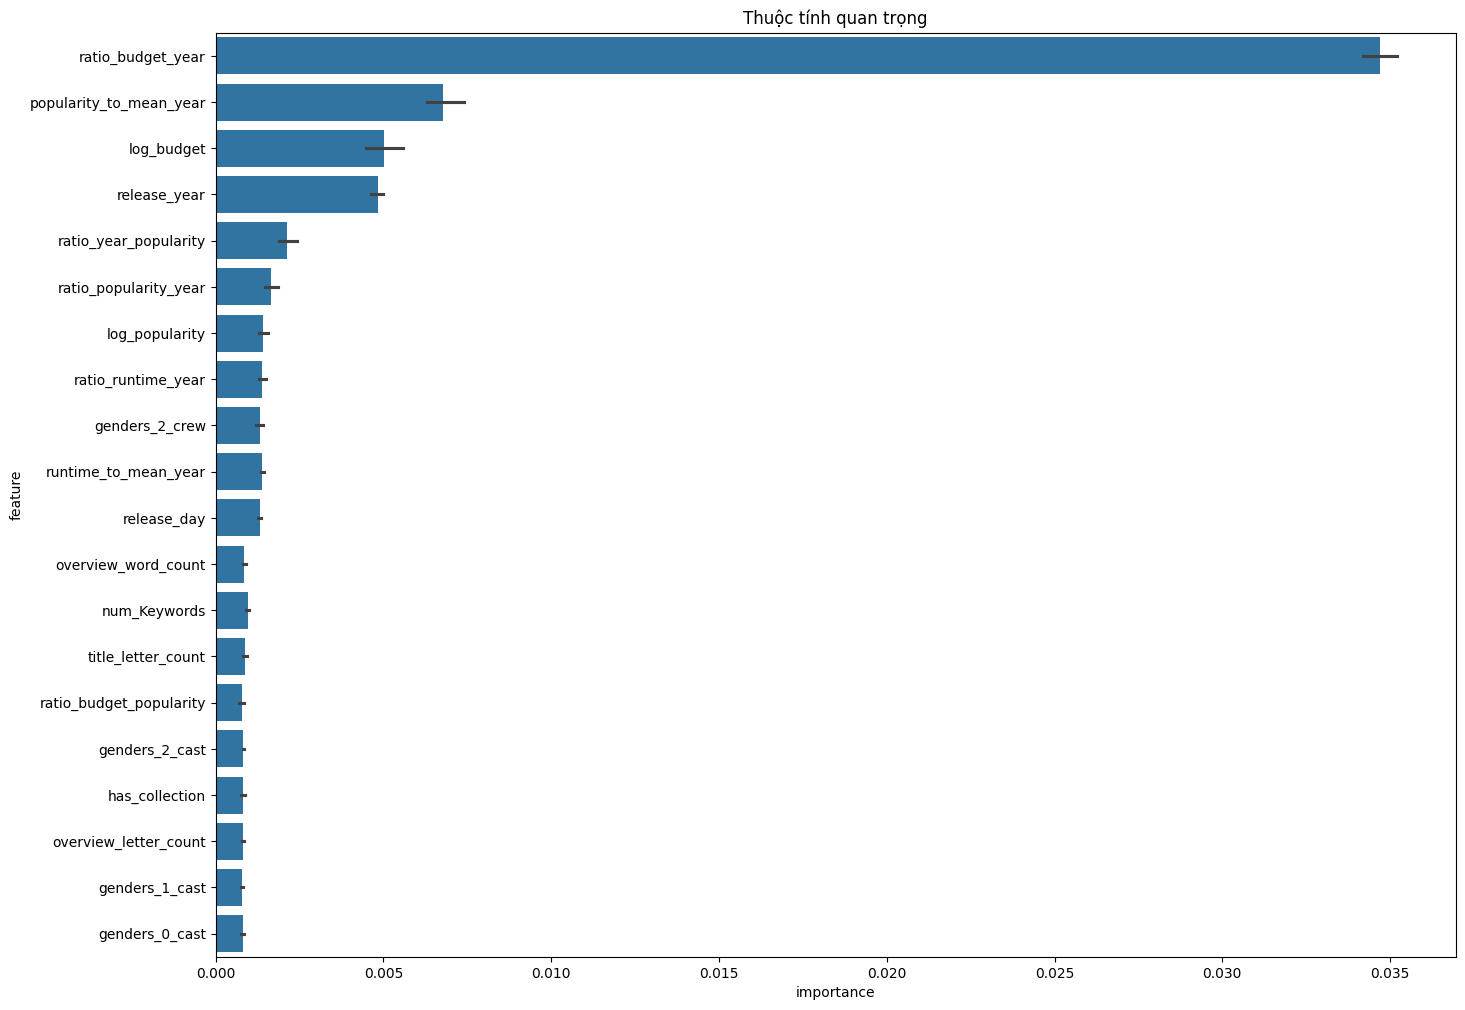

In [21]:
params = {
    "n_estimators": 50,
    "max_depth": 10
}
params = {}
start = time.time()
rf_pred, rf_score = models(X_train, X_valid, y_train, y_valid, test, "rf", params, plot_feature_importance=True)
end = time.time()
rf_time = (end-start)/60
print("Thời gian chạy: {0:.2f} m".format(rf_time))

Fold 1 bắt đầu lúc Wed Feb 28 09:45:35 2024
Fold 2 bắt đầu lúc Wed Feb 28 09:46:09 2024
Fold 3 bắt đầu lúc Wed Feb 28 09:46:38 2024
Fold 4 bắt đầu lúc Wed Feb 28 09:47:13 2024
Fold 5 bắt đầu lúc Wed Feb 28 09:48:05 2024
Fold 6 bắt đầu lúc Wed Feb 28 09:48:49 2024
Fold 7 bắt đầu lúc Wed Feb 28 09:49:27 2024
Fold 8 bắt đầu lúc Wed Feb 28 09:49:44 2024
Fold 9 bắt đầu lúc Wed Feb 28 09:50:13 2024
Fold 10 bắt đầu lúc Wed Feb 28 09:50:49 2024
Mean RMSE: 1.97942, std: 0.19662.
Thời gian chạy: 5.81 m


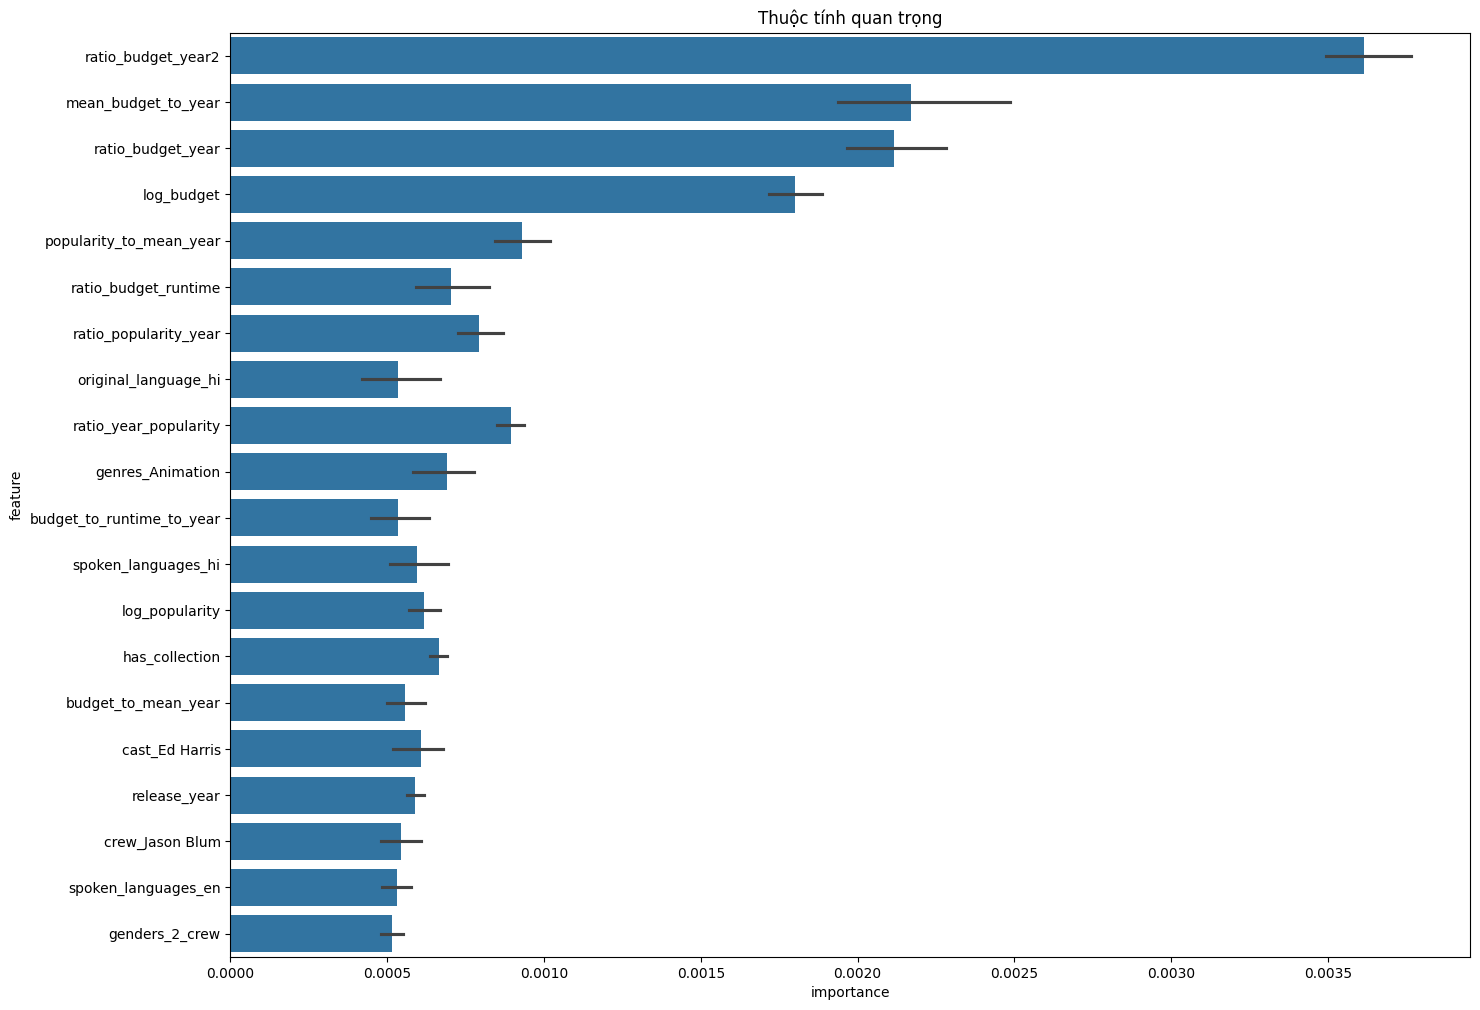

In [22]:
xgb_params = {"objective": "reg:squarederror",
              "eta": 0.01,
              "max_depth": 5,
              "min_child_weight": 3,
              "subsample": 0.8,
              "colsample_bytree": 0.7,
              "colsample_bylevel": 0.5,
              "eval_metric": "rmse",
              "seed": 22}
start = time.time()
xgb_pred, xgb_score = models(X_train, X_valid, y_train, y_valid, test, "xgb", xgb_params, True)
end = time.time()
xgb_time = (end-start)/60
print("Thời gian chạy: {0:.2f} m".format(xgb_time))

#### **Lightgbm**

Fold 1 bắt đầu lúc Wed Feb 28 09:51:24 2024
Fold 2 bắt đầu lúc Wed Feb 28 09:54:09 2024
Fold 3 bắt đầu lúc Wed Feb 28 09:57:06 2024
Fold 4 bắt đầu lúc Wed Feb 28 09:59:59 2024
Fold 5 bắt đầu lúc Wed Feb 28 10:02:38 2024
Fold 6 bắt đầu lúc Wed Feb 28 10:05:13 2024
Fold 7 bắt đầu lúc Wed Feb 28 10:07:51 2024
Fold 8 bắt đầu lúc Wed Feb 28 10:10:32 2024
Fold 9 bắt đầu lúc Wed Feb 28 10:13:13 2024
Fold 10 bắt đầu lúc Wed Feb 28 10:15:56 2024
Mean RMSE: 1.92821, std: 0.16118.
Thời gian chạy: 27.25 m


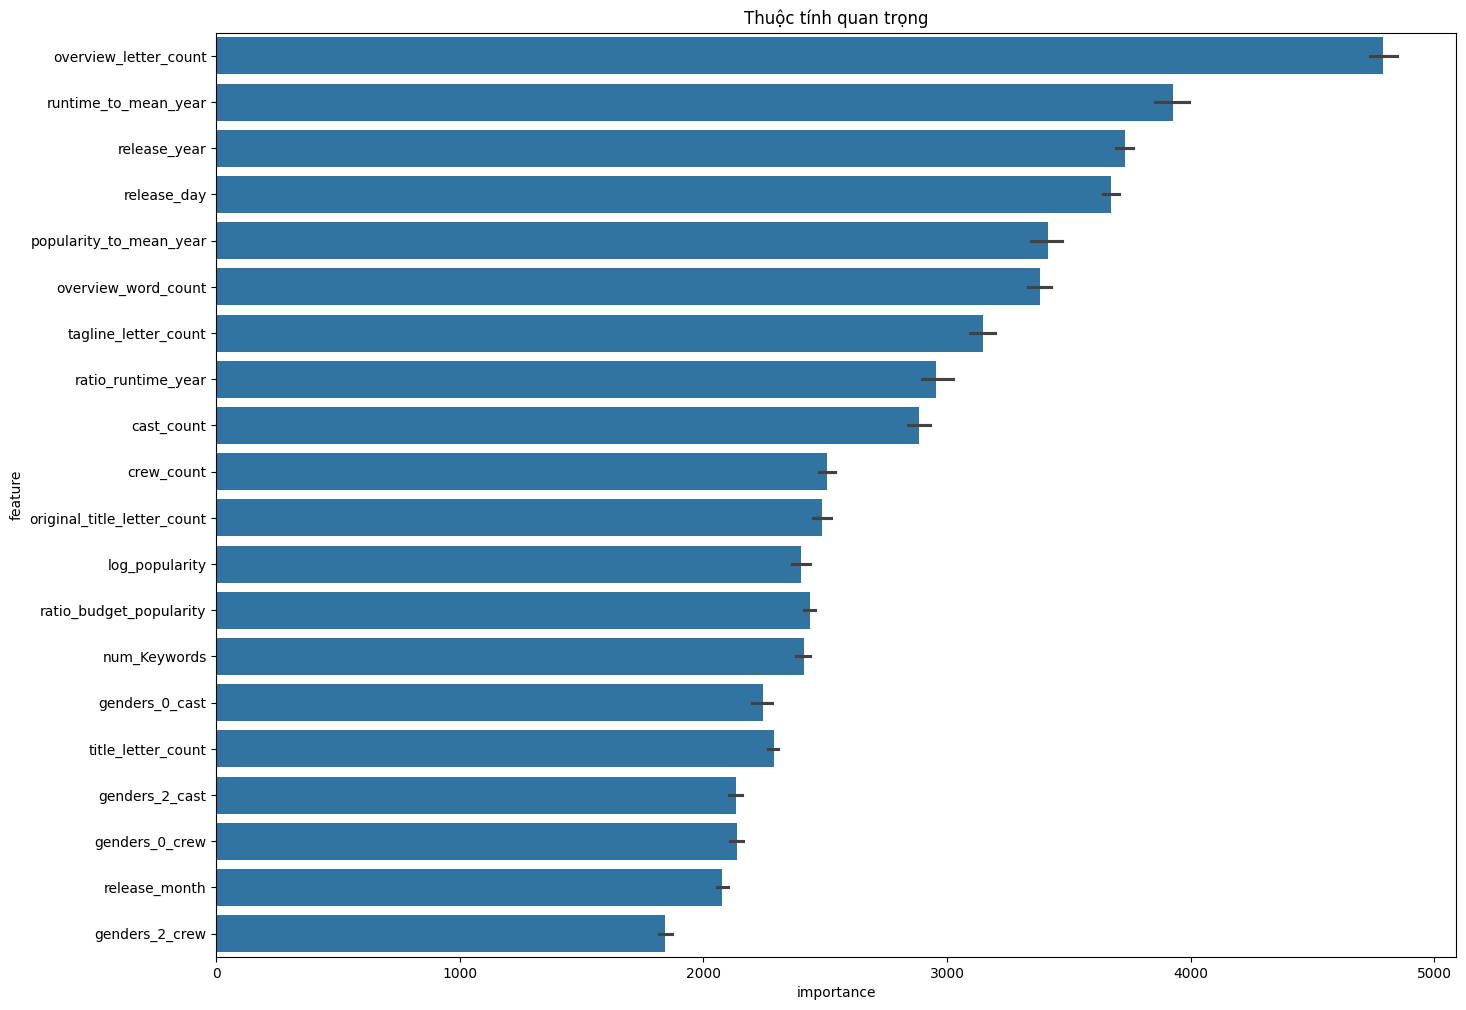

In [23]:
lgb_params = {"objective": "regression",
              "num_leaves": 40,
              "min_data_in_leaf": 10,
              "max_depth": 7,
              "learning_rate": 0.01,
              "boosting": "gbdt",
              "feature_fraction": 0.9,
              "bagging_freq": 1,
              "bagging_fraction": 0.7,
              "bagging_seed": 22,
              "metric": "rmse",
              "lambda_l1": 0.2,
              "verbosity": -1}
start = time.time()
lgb_pred, lgb_score = models(X_train, X_valid, y_train, y_valid, test, "lgb", lgb_params, True)
end = time.time()
lgb_time = (end-start) / 60
print("Thời gian chạy: {0:.2f} m".format(lgb_time))

### **CatBoost**

Fold 1 bắt đầu lúc Wed Feb 28 10:18:39 2024
Fold 2 bắt đầu lúc Wed Feb 28 10:19:12 2024
Fold 3 bắt đầu lúc Wed Feb 28 10:19:52 2024
Fold 4 bắt đầu lúc Wed Feb 28 10:20:24 2024
Fold 5 bắt đầu lúc Wed Feb 28 10:21:21 2024
Fold 6 bắt đầu lúc Wed Feb 28 10:21:49 2024
Fold 7 bắt đầu lúc Wed Feb 28 10:22:46 2024
Fold 8 bắt đầu lúc Wed Feb 28 10:23:11 2024
Fold 9 bắt đầu lúc Wed Feb 28 10:23:34 2024
Fold 10 bắt đầu lúc Wed Feb 28 10:24:12 2024
Mean RMSE: 1.85912, std: 0.17281.
Thời gian chạy: 6.53 m


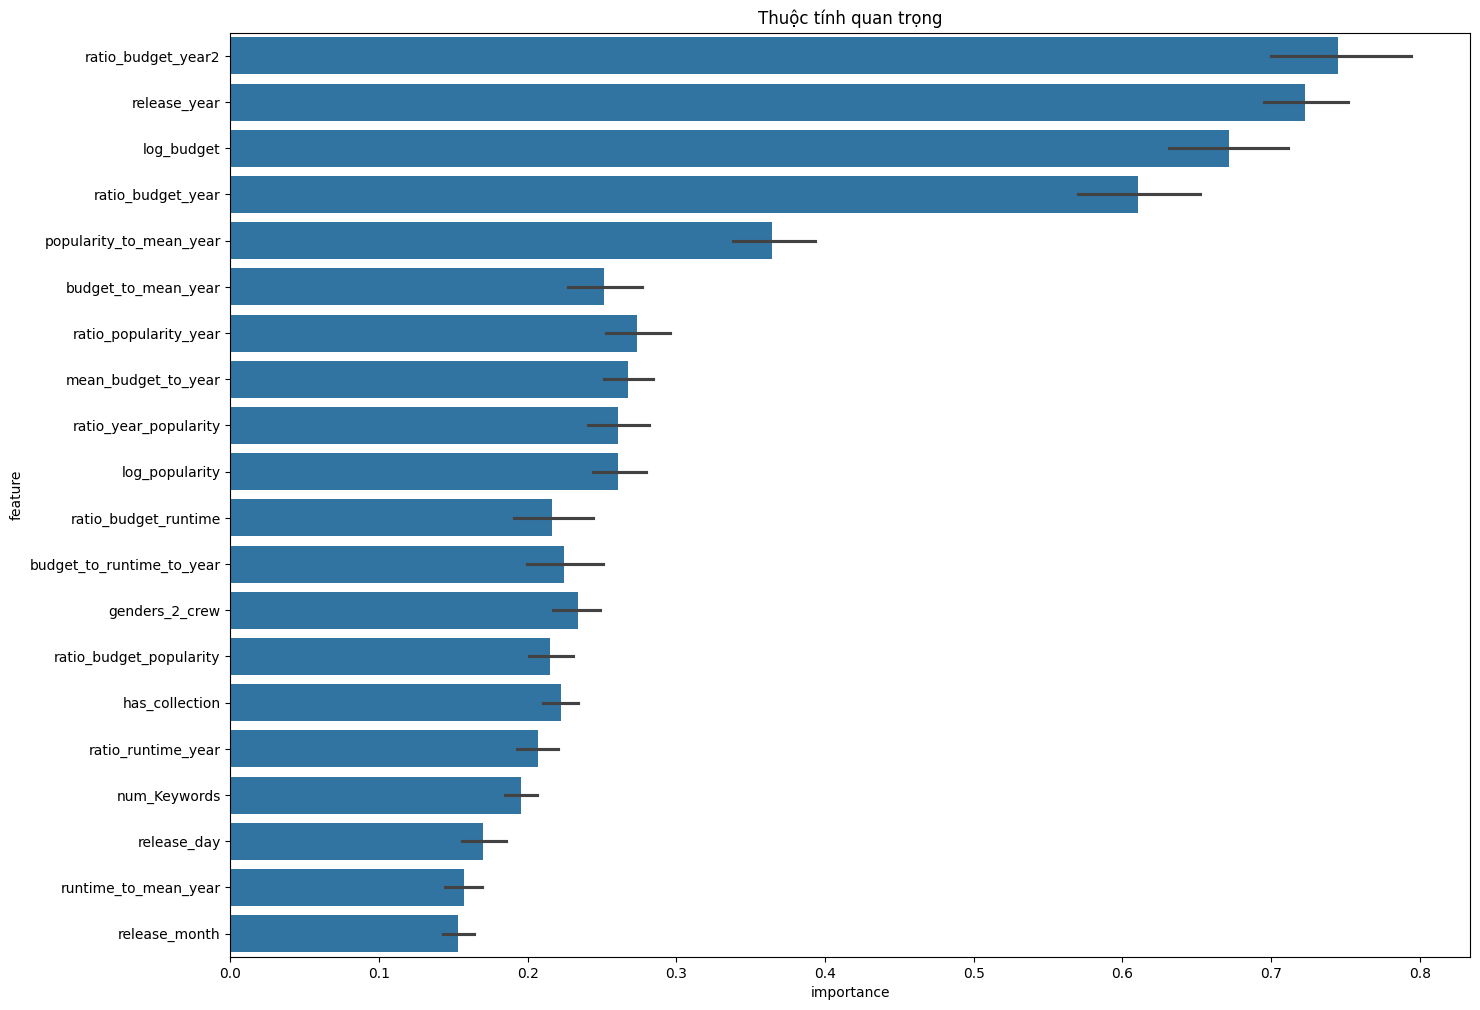

In [24]:
cat_params = {"learning_rate": 0.01,
              "depth": 7,
              "colsample_bylevel": 0.7,
              "bagging_temperature": 0.2,
              "l2_leaf_reg": 1,
              "random_seed": 22,
              "allow_writing_files": False,
              "early_stopping_rounds": 200
             }
start = time.time()
cat_pred, cat_score = models(X_train, X_valid, y_train, y_valid, test, "cat", cat_params, True)
end = time.time()
cat_time = (end-start)/60
print("Thời gian chạy: {0:.2f} m".format(cat_time))

### **Đánh giá kết quả**
- Nhận xét:
  - Cả 5 thuật toán đều mô hình hóa thành công dữ liệu.
  - Từ biểu đồ cho thấy các thuộc tính **`ratio_budget_year`**, **`log_budget`**, **`release_year`**, **`popularity_to_mean_year`** là những yếu tố cực kỳ quan trọng khi xuất hiện trong 3 trên 4 mô hình.
  - Mô hình đưa ra độ đo hiệu quả là: **`Random Forest`**, **`Xgboost`**, **`Lightgbm`**, **`CatBoost`** trong đó hiệu quả nhất là **`CatBoost`**, tuy nhiên chênh lệch là không đáng kể.
  - Thời gian chạy mô hình nhanh nhất là **`Linear Regression`**, mất chưa tới 1 phút để đưa ra kết quả, tuy nhiên kết quả cho ra lại là kết quả tệ nhất, chứng tỏ mô hình **`Linear Regression`** không phù hợp với bài toán này.

In [25]:
models = []
models.append("Linear Regression")
models.append("Random Forest")
models.append("Xgboost")
models.append("Lightgbm")
models.append("CatBoost")

scores = []
scores.append(np.mean(lr_score))
scores.append(np.mean(rf_score))
scores.append(np.mean(xgb_score))
scores.append(np.mean(lgb_score))
scores.append(np.mean(cat_score))

times = []
times.append(lr_time)
times.append(rf_time)
times.append(xgb_time)
times.append(lgb_time)
times.append(cat_time)


models_df = pd.DataFrame()
models_df["models"] = models
models_df["scores"] = scores
models_df["times"] =  times
models_df

,models,scores,times
0,Linear Regression,6.649109,0.128496
1,Random Forest,2.074314,2.411434
2,Xgboost,1.979416,5.808688
3,Lightgbm,1.928209,27.247360
4,CatBoost,1.859120,6.525924


#### **Độ lỗi của các mô hình**

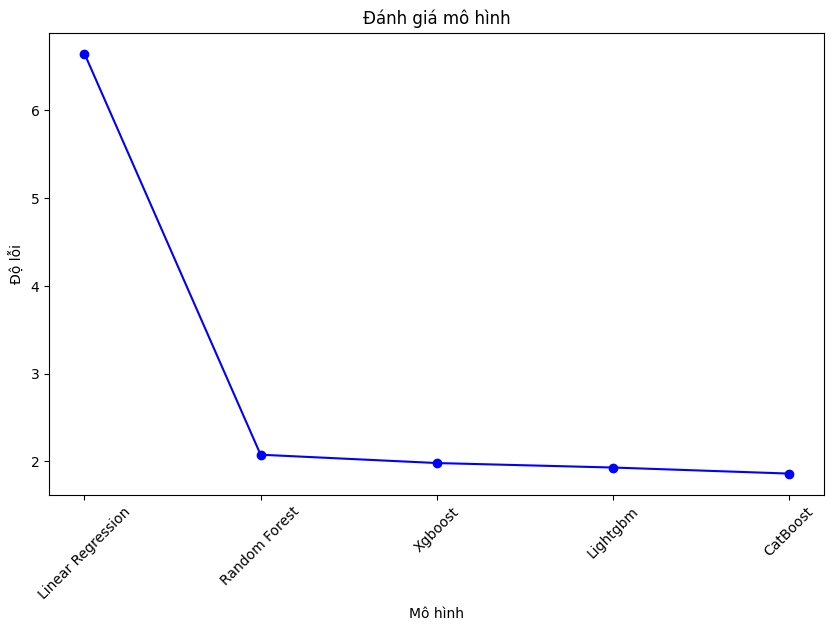

In [26]:
sc_models_df = models_df.sort_values(by="scores", ascending=False)

plt.figure(figsize=(10,6))
plt.plot(sc_models_df["models"], sc_models_df["scores"], marker="o", linestyle="-", color="blue")

plt.xlabel("Mô hình")
plt.ylabel("Độ lỗi")
plt.title("Đánh giá mô hình")

plt.xticks(rotation=45)
plt.show()

#### **Thời gian chạy các mô hình**

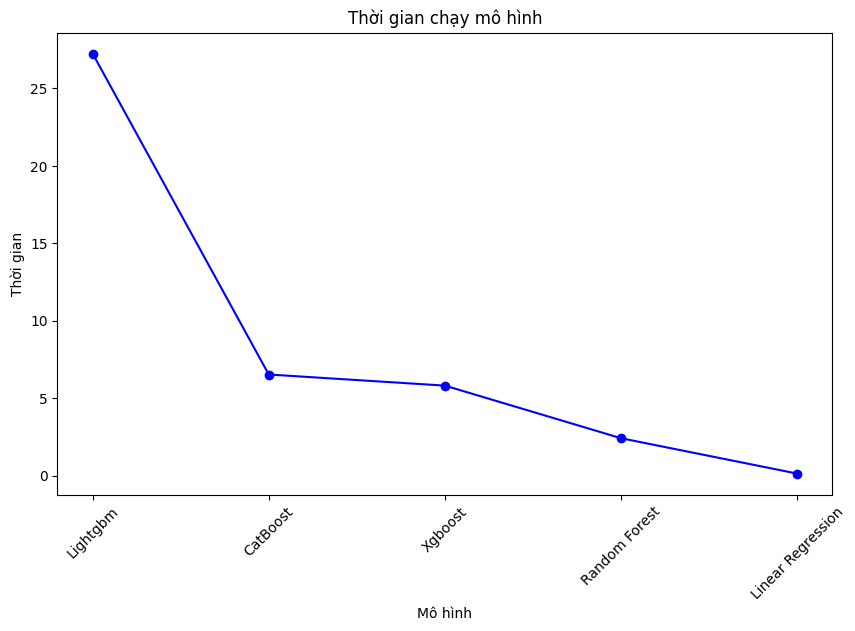

In [27]:
time_models_df = models_df.sort_values(by="times", ascending=False)

plt.figure(figsize=(10,6))
plt.plot(time_models_df["models"], time_models_df["times"], marker="o", linestyle="-", color="blue")

plt.xlabel("Mô hình")
plt.ylabel("Thời gian")
plt.title("Thời gian chạy mô hình")

plt.xticks(rotation=45)
plt.show()

### **Kết quả trên Kaggle**
- Nhóm lựa chọn kết quả của mô hình CatBoost là kết quả để nộp lên Kaggle.

In [28]:
sub = pd.read_csv("sample_submission.csv")
df_sub = pd.DataFrame()
df_sub["id"] = sub["id"]
df_sub["revenue"] = np.expm1(cat_pred)
df_sub.to_csv("submission.csv", index=False)

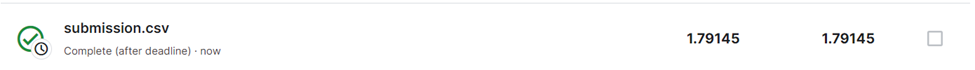

-	Với kết quả như trên thì thứ hạng mà nhóm có thể đạt được là 302 trong trên tổng số 1395 người tham gia.
-	Đây là một kết quả không quá tệ khi tham gia vào dự án lớn như vậy trên Kaggle.

# **3.6. Nhìn lại quá trình làm đồ án**
-	Qua đồ án, em đã học được rất nhiều điều:
  - Ôn lại các kiến thức đã được học từ các môn trước đó.
  - Triển khai được các quy trình của một dự án khoa học dữ liệu trên một cuộc thi Kaggle.
  - Khi triển khai một cuộc thi Kaggle, đã mang lại cho nhóm một trải nghiệm thực tế và làm quen với quy trình làm việc trong lĩnh vực này.
-	Những gì chưa làm được:
  - Kết quả trên Kaggle chưa cao.
  - Còn hạn chế về thời gian nên chưa tối ưu được một số bước.


# **3.7. Tài liệu tham khảo**
- Link Kaggle: [Xem tại đây](https://www.kaggle.com/competitions/tmdb-box-office-prediction/overview).
- [Slide Applied Data Science](https://drive.google.com/drive/folders/1AIjAjoWg9yiT954iD-iPnSrfDvVWtM4N).
- [Sklearn for ML](https://scikit-learn.org/stable/modules/classes.html).
- [Catboost for ML](https://www.geeksforgeeks.org/catboost-ml/).
- [Xgboost for ML](https://www.geeksforgeeks.org/xgboost/).